# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [239]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [240]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [241]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [242]:
df.nunique()[0]

290584

**d.** The proportion of users converted.

In [243]:
df[df.converted == 1].groupby('user_id').nunique().count()[0] /df.nunique()[0]

0.12104245244060237

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [244]:
df.query('group == "treatment" & landing_page != "new_page"').count()[0] \
+  df.query('group != "treatment" & landing_page == "new_page"').count()[0]

3893

**f.** Do any of the rows have missing values?

In [245]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

**There are no missing values in the dataframe**

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [246]:
#Make a copy of the dataframe - new dataframe is called df2
df2 = df.copy()
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [247]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2.drop(df2.query("group == 'treatment' and landing_page=='old_page'").index, inplace=True)
df2.shape

(292513, 5)

In [248]:
df2.drop(df2.query("group == 'control' and landing_page=='new_page'").index, inplace=True)
df2.shape

(290585, 5)

In [249]:
# Double check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [250]:
df2.nunique()[0]

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [251]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [252]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [253]:
df2[df2['timestamp'] == '2017-01-09 05:37:58.781806']

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [254]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
# Since the duplicated under-ids do not have rows that are entirely unique, a check of the timestamp in the 
# proved that it was unique, so one row was removed based on that 
df2[df2['timestamp'] == '2017-01-09 05:37:58.781806']
df2.drop(df2.query("timestamp == '2017-01-09 05:37:58.781806'").index, inplace=True)

# Check again if the row with a duplicate user_id is deleted or not
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [255]:
df2[df2.converted == 1].count()[0]/df2.shape[0]

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [256]:
control_converted = df2.query("group == 'control' and converted ==1").count()[0] \
/ df2.query("group == 'control' ").count()[0]
control_converted

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [257]:
treatment_converted = df2.query("group == 'treatment' and converted ==1").count()[0] \
/ df2.query("group == 'treatment' ").count()[0]
treatment_converted

0.11880806551510564

In [258]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_converted  - control_converted  
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [259]:
df2.query("landing_page == 'new_page' ").count()[0] / df2.shape[0]

0.50006194422266881

The following is the number of users in the Control and Treatment groups who converted

In [260]:
df2.query("group == 'control' and converted ==1").count()[0]

17489

In [261]:
df2.query("group == 'treatment' and converted ==1").count()[0]

17264

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Answer:**
The new treatment group users lead to slightly lower conversions. Based on the results above, the conversion rate was slightly higher for users in the control group, than for users in the treatment group.
I emphasize 'slightly' because the number of users in each group was close, as well as the number of converted in each group. 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**Answer:**
<center>
H0: $p_{new}$ <= $p_{old}$ 
</center>
<center>
H1: $p_{new}$ > $p_{old}$ 
</center>

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>
- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [262]:
#Conversion rate for pnew
p_new = df2['converted'].mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [263]:
#Conversion rate for pold
p_old = df2['converted'].mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [264]:
#Number of individuals in treatment group
n_new = df2.query("group == 'treatment' ").count()[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [265]:
#Number of individuals in control group
n_old = df2.query("group == 'control' ").count()[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [266]:
# Simulate a Sample for the treatment Group
#n_new is the number of new pages 
new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new, p_new])
new_page_converted

array([1, 0, 0, ..., 0, 1, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [267]:
# Simulate a Sample for the control Group
#n_old is the number of old pages
old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old, p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [268]:
samp_diff = new_page_converted.mean() - old_page_converted.mean()
samp_diff

-0.0010413140109555297


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [269]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old, p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>  


**Answer:**
The plot is what I expected, since we have sampled a large number of data (by using the large number theory). Therefore we were able to get a normal distribution plot. 

Text(0,0.5,'Number of occurrences')

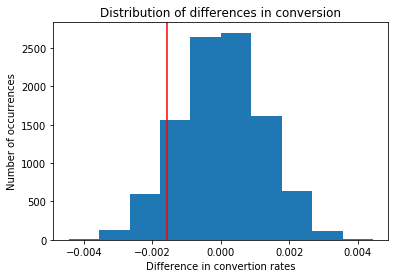

In [270]:
# null_val = np.random.normal(0, np.std(p_diffs), p_diffs.shape[0])
plt.hist(p_diffs)
plt.axvline(obs_diff, color='r')
plt.title('Distribution of differences in conversion')
plt.xlabel('Difference in convertion rates')
plt.ylabel('Number of occurrences')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [271]:
#obs_diff is the actual difference observed in df2 data (calculated above In [21] )
(p_diffs > obs_diff).mean()

0.90149999999999997

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**Answer:**
The value returned in j is the p-value, which is used to help confirm or reject the null hypothesis. The p-value returned is approximately 0.9, which is close to 1. The p-value is larger than the Type 1 error rate (0.05), and indicates that there is no evidence to reject the null hypothesis. Therefore we can accept that the conversion rate is higher with the old pages than with the new pages.



**l. Using Built-in Methods for Hypothesis Testing**<br>

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [272]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("landing_page == 'old_page' and converted ==1").count()[0]
convert_old
# number of conversions with the new_page
convert_new = df2.query("landing_page == 'new_page' and converted ==1").count()[0]
convert_new

# number of individuals who were shown the old_page
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_old

# number of individuals who received new_page
n_new = df2.query("landing_page == 'new_page'").count()[0]
n_new

145310

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value. 

In [273]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old],[n_old, n_new],alternative='larger' )
print(z_score, p_value)

-1.26169574219 0.896470855197


In my quest to gain an understanding of the significance of z-tests, I did some research and this is my attempt to put what I have found to work. I've learnt that not all implementations of statistical tests return p-values and a statistics calculation of a statistical hypothesis test can be interpreted using 'Critical values' for z-test.


In [274]:
#The following uses crtical values by applying standard gaussian distribution
# Gaussian Percent Point Function
from scipy.stats import norm
# define probability using 95% confidence level
p = 0.95
# retrieve value <= probability
value = norm.ppf(p)
print(value)
# confirm with cdf
p = norm.cdf(value)
print(p)

1.64485362695
0.95


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Answer:**
The z-score (is a test statistic) which determines the number of standard deviations from the mean, and in this case, its how many standard deviations the actual difference observed in df2 (obs_diff) is from p_diff. 
Using 95% confidence interval in the calculation above, the 𝑍0.05, also known as critical value returned is 1.645 for one-tailed test.
The calculated z-score above is 0.95 and the p-value calculated earlier is 0.906, and there are approximately the same. Also, with the 95% confidence interval and doing a right tail test (i.e. 𝐻1 defined as  (𝑝𝑛𝑒𝑤>𝑝𝑜𝑙𝑑)), the critical value of 1.645 proves that z-score is not greater than Z0.05.
With the findings from the z-test, we can conclude that the new page will not have more converts than the old page, and therefore the null hypothesis will not be rejected. 

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Answer:**
Logistic Regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [275]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [276]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['landing_page'])['new_page']

In [277]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [278]:
#Using Logit
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page' ]])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [279]:
# lm = sm.OLS(df2['converted'], df2[['intercept','ab_page' ]])
# results = lm.fit()

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [280]:
#d.Summary of model:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-24 14:55 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


In [281]:
#exponeniate the coefficient of ab_page
np.exp(-0.0150)

0.98511193960306265

>**Answer:**

The p-value for ab_page is approximately 0.19, and different from the p_value in Part II, which was 0.9. I assume this is so because the null hypothesis for Part II is 𝑝𝑛𝑒𝑤  <=  𝑝𝑜𝑙𝑑 (and is a right-tailed test, which is  one sided ) and the alternative is 𝑝𝑛𝑒𝑤  >  𝑝𝑜𝑙𝑑, and for Part III, it is 𝑝𝑛𝑒𝑤  =  𝑝𝑜𝑙𝑑 and a two-sided test.

The ab_page coefficient value is negative and still indicates that the new pages do not affect the conversion rate.


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Answer:**

I would assume there are other things that might influence whether or not an individual converts, some of which are the demographics of the audience being targeted, as well as how user intuitive the new site is, in terms of ease of navigation and accessibility (ADA), as well as content. 
Based on what I gathered from the lessons, the closer R-squared is to 1, the better the model. Since we are getting 0.000 from this model, I would be inclined to add additional terms to make R-squared as close to 1 as possible.
Possible disadvantage to adding additional terms is that they may become correlated to one another. They may have relations with each other but when fitting to a model, such as MLR, we may not see the same relationships with all the variables. 
Other problems may be the absence of linear relationship, correlated errors, non constant variables, outliers and multicollinearity.
If linear regressions model is applied and if the true relationship is not linear, then the resulting conclusion may be considered suspicious. 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

Provide the statistical output as well as a written response to answer this question.

In [282]:
# Read countries.csv into dataframe df_country
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [283]:
#Check number of unique rows
df_country.nunique()[0]

290584

In [284]:
#Confirm row count is the same as df2
df2.shape[0]

290584

In [285]:
# Merge the two dataframes
df_merged = df2.merge(df_country,  how= 'inner', left_on= 'user_id', right_on='user_id')


In [286]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [287]:
# Create the necessary dummy variables

df_merged[['US', 'CA', 'UK']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [288]:
#drop one column (CA) to get full rank
df_merged = df_merged.drop('CA', axis=1)

In [289]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [290]:
# Fit the model, and summarize the results
logit_mod1 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page','US', 'UK' ]])
results = logit_mod1.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-24 14:55 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
UK           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
==================================================================

"""

In [291]:
#To interpret the coefficient, they will be exponeniated
np.exp(-0.0149), np.exp(-0.0506), np.exp(-0.0099)

(0.9852104557227469, 0.95065885803307082, 0.99014884368295719)

>**Conclusion:**
The coefficients in the results summary were exponeniated since they cannot be inperpreted in the exact way as in linear regression. 
The US users were .95 times more likely to convert and UK users were .99 more likely to convert, holding all other variables constant.
The p-values for US and UK are both greater than 0.05, which shows that there has been no significant change in the model with the addition of variables, when compared to the previous tests done earlier, in this assignment, including the z-test. Therefore this model fails to reject the null hypothesis, and the company should retain the old pages of the website. 

**P.S.** As a new student of statistics, this project helped me to get a better understanding of the lessons covered. However, given the vastness of the subject matter, and other constraints, there are still areas I found challenging and need to revisit for deeper understanding, but I've tried to do my best to apply to this project what I've grasp thus far. 


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [293]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0